<a href="https://colab.research.google.com/github/akibae7/Task0-Titanic-Exploration/blob/main/task0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np


In [48]:
#Download the dataset and load it using Pandas.
from google.colab  import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df=pd.read_csv('/content/drive/MyDrive/DAC/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Remove all the NULL values from the dataset.
df_cleaned = df.dropna(how='any',axis=0)
df_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# Remove 'Name' and 'PassengerID' column
df_cleaned.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df_cleaned

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
#Divide the dataset in 80:20 ratio using .loc and .iloc ONLY

data_80 = df_cleaned.iloc[0:147]
data_20 = df_cleaned.iloc[148:183]
data_80

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
699,0,3,male,42.0,0,0,348121,7.6500,F G63,S
700,1,1,female,18.0,1,0,PC 17757,227.5250,C62 C64,C
701,1,1,male,35.0,0,0,PC 17475,26.2875,E24,S
707,1,1,male,42.0,0,0,PC 17476,26.2875,E24,S


In [ ]:
data_20

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
715,0,3,male,19.0,0,0,348124,7.6500,F G73,S
716,1,1,female,38.0,0,0,PC 17757,227.5250,C45,C
717,1,2,female,27.0,0,0,34218,10.5000,E101,S
724,1,1,male,27.0,1,0,113806,53.1000,E8,S
730,1,1,female,29.0,0,0,24160,211.3375,B5,S
737,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C
741,0,1,male,36.0,1,0,19877,78.8500,C46,S
742,1,1,female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
745,0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S
748,0,1,male,19.0,1,0,113773,53.1000,D30,S


(array([16., 62., 64., 36.,  5.]),
 array([ 0.92 , 16.736, 32.552, 48.368, 64.184, 80.   ]),
 <a list of 5 Patch objects>)

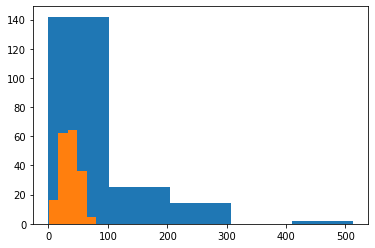

In [ ]:
#Plot a histogram for 'Fare','Age' column
import matplotlib.pyplot as plt

plt.hist(df_cleaned['Fare'],bins=5)
plt.hist(df_cleaned['Age'],bins=5)

In [ ]:
df_cleaned.nunique()


Survived      2
Pclass        3
Sex           2
Age          63
SibSp         4
Parch         4
Ticket      127
Fare         93
Cabin       133
Embarked      3
dtype: int64

<BarContainer object of 183 artists>

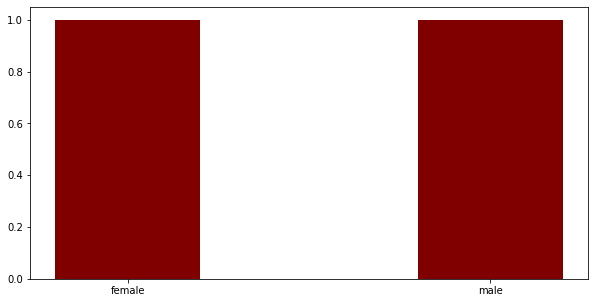

In [ ]:
#Plot bar chart for all binary columns (like 'Survived')
fig = plt.figure(figsize = (10,5))
plt.bar(df_cleaned.Sex, df_cleaned.Survived, color ='maroon',width = 0.4)